In [1]:
from qiskit import *
import qiskit.quantum_info as qi
import numpy as np
from qiskit.visualization import *
from math import sqrt, pi
from IPython.display import display, Math
svsim = Aer.get_backend('aer_simulator') 

# Q1
For $\varepsilon(\rho)$ to be a valid density operator, it must be a semi-positive definite operator with trace as 1.<br>
For any state $\psi$, $\langle\psi|\varepsilon|\psi\rangle = \sum\limits_{i}\langle\psi |E_i \rho E_i ^\dagger|\psi\rangle = \sum\limits_{i}\langle E_i^\dagger \psi| \rho| E_i ^\dagger\psi\rangle \geq 0$, hence $\varepsilon(\rho)$ is already positive.<br>
$tr(\varepsilon(\rho)) = \sum\limits_i tr(E_i\rho E_i^{\dagger})=\sum\limits_i tr(E_i^{\dagger}E_i\rho)=tr(A\rho)$, where $A = \sum\limits_i E_i^\dagger E_i$.<br>
Since this has to be 1 for any $\rho$ for $\{E_i\}$ to be a valid $K(\varepsilon)$, $A = \sum\limits_i E_i^\dagger E_i = I$

# Q2
A possible approach for creating a quantum channel, is to involve an environment which the system interacts with.<br>
Given a principal system, $P$ (initially in $\rho_P$), and an environment, $E$ (initially in $|{e_0}\rangle_E$). If we let their joint system evolve unitarily according to $U$, and then consider the reduced principal system again, we get:<br>
$$\varepsilon(\rho_P) = tr_E(U(\rho_P\otimes|{e_0}_E\rangle\langle [{e_0}_E|)U^\dagger) = \sum\limits_k \langle {e_k}_E|U(\rho_P\otimes|{e_0}_E\rangle\langle {e_0}_E|)U^\dagger|{e_k}_E\rangle = \sum\limits_k E_k\rho_P E_k^\dagger$$
where $\{{e_k}_E\}$ is an orthonormal basis of the $E$ state space.<br> 
And the $\{E_k\}$'s are operators acting on the system state space as follows:
$$E_k \psi_P = (I_P\otimes \langle {e_k}_E|)U(\psi_P \otimes{e_0}_E)\equiv \langle {e_k}_E|U|{e_0}_E\rangle\psi_P$$

In [2]:
initial_state = [1, 0]
rho_initial = qi.DensityMatrix.from_label('0')
rho_initial.draw('latex', prefix="\\rho_{i}=")

<IPython.core.display.Latex object>

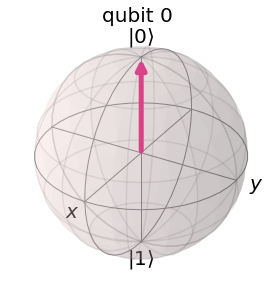

In [3]:
rho_initial.draw('bloch')

Our task is to find the appropriate $U$ given, $\rho = \begin{pmatrix} 1 & 0\\ 0 & 0\end{pmatrix}$ and $\varepsilon(\rho) = \frac{1}{2}\begin{pmatrix} 1 & 0\\ 0 & 1\end{pmatrix}$<br>
To do so, we have the freedom to pick an appropriate $|{e_0}_E\rangle$, which we take to be $|+\rangle_E = \frac{1}{\sqrt2}|0\rangle_E + \frac{1}{\sqrt2}|1\rangle_E$<br>
Also, we observe that:
$$\begin{pmatrix} 1 & 0\\ 0 & 1\end{pmatrix} = \begin{pmatrix} 1 & 0\\ 0 & 0\end{pmatrix} + \begin{pmatrix} 0 & 0\\ 0 & 1\end{pmatrix} = \rho + \begin{pmatrix} 0 & 1\\ 1 & 0\end{pmatrix} \begin{pmatrix} 1 & 0\\ 0 & 0\end{pmatrix} \begin{pmatrix} 0 & 1\\ 1 & 0\end{pmatrix} = I\rho I^\dagger + X\rho X^\dagger$$
Hence, $E_0 = \frac{I}{\sqrt 2}$, $E_1 = \frac{X}{\sqrt 2}$<br>
Therefore we have that:
$$\langle 0 |_E U |0\rangle_E + \langle 0 |_E U |1\rangle_E = I_P$$
$$\langle 1 |_E U |0\rangle_E + \langle 1 |_E U |1\rangle_E = X_P$$
From here, we have one value of U as:
$$\begin{align*}U &= |0\rangle_P\langle 0|_P \otimes |0\rangle_E\langle 0|_E +  |1\rangle_P\langle 1|_P \otimes |0\rangle_E\langle 0|_E + |0\rangle_P\langle 1|_P \otimes |1\rangle_E\langle 1|_E + |1\rangle_P\langle 0|_P \otimes|1\rangle_E\langle 1|_E\\ &= |00\rangle\langle 00 | + |10\rangle \langle 10|+|01\rangle\langle 11|+|11\rangle\langle01|\end{align*}$$

Now we simply need to find 2-qubit gates between the system and the environment that do the above unitary operation<br>
We can see that: 
$$\begin{matrix}
x_1 & x_2 & \rightarrow &x_3 & x_4 \\
0 & 0 & \quad & 0 & 0 \\
0 & 1 & \quad & 1 & 1 \\
1 & 0 & \quad & 1 & 0 \\
1 & 1 & \quad & 0 & 1 
\end{matrix}$$
is the same as $(x_3, x_4) = (x_1\oplus x_2, x_2)$

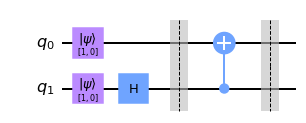

In [4]:
qc = QuantumCircuit(2)
qc.initialize(initial_state, 0)
qc.initialize([1, 0], 1)
qc.h(1)
qc.barrier()
#qc.swap(0, 1)
qc.cx(1, 0)
qc.barrier()
qc.draw('mpl')

In the above circuit, $q_0$ is our principal system and $q_1$ is the environment. We initialize the environment in $|+\rangle$. Then, perform the above found $U$ and get the partial trace of the system from the total density operator using the module functions.

In [5]:
svsim.run(assemble(qc))
rho_sys = qi.partial_trace(qi.DensityMatrix.from_instruction(qc), [0])
rho_sys.draw('latex', prefix="\\rho_{f}=")

<IPython.core.display.Latex object>

# Q3
We represent density operators for a single qubit system as the vector $\vec{r}$ such that:
$$\rho = \frac{I + \vec{r}\cdot\vec{\sigma}}{2}= \begin{pmatrix}\frac{1 + r_z}{2} & \frac{r_x-i r_y}{2}\\ \frac{r_x + ir_y}{2} & \frac{1-r_z}{2}\end{pmatrix}$$

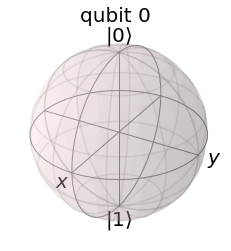

In [6]:
rho_sys.draw('bloch')

# Q4
von Neumann entropy for a quantum state is written as:
$$S(\rho) = -tr(\rho\log\rho) = \sum\limits_i \lambda_i \log\lambda_i \quad\quad \text{where the log is conventionally with base 2}$$
where the $\lambda_i$'s are the (necessarily non-negative) eigenvalues of $\rho$ and $0\log 0$ is taken to be the limiting value of 0.<br>
For the initial pure state $\rho_i = \begin{pmatrix}1&0\\0&0\end{pmatrix}\equiv|0\rangle$, the eigenvalues are 0 and 1 $\therefore S(\rho_i) = 0$<br>
For the mixed state $\rho_f = \begin{pmatrix}1/2&0\\0&1/2\end{pmatrix}\equiv\frac{1}{2}|0\rangle\langle0|+\frac{1}{2}|1\rangle\langle1|$, the eigenvalues are $\left\{\frac{1}{2}, \frac{1}{2}\right\}\therefore S(\rho_f) = \log 2 = 1$<br>
We can understand the increased entropy of the second state as its state being "uncertain". Since, it is in $|0\rangle$ with probability 0.5 and in $|1\rangle$ with probability 0.5.<br>
This also motivates density operator formalism since $\rho$ is a compact way to treat mixed states along with pure states.